In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.special
from mpmath import *
import random
import time

We ask for $n \geq 1$.

In [2]:
n=1_000_000

In [3]:
import math

def find_the_mode(n):
    """
    Computes the value of ⌈1 / (2^(1/n) - 1⌉ for a given integer n.

    Parameters:
        n (int): The exponent in the expression.

    Returns:
        int: The computed mode.
    """
    if n <= 0:
        raise ValueError("n must be a positive integer.")
    nth_root_of_2 = 2 ** (1 / n)
    denominator = nth_root_of_2 - 1
    if denominator <= 0:
        raise ValueError("Denominator is non-positive. Check the input value of n.")
    result = 1 / denominator
    return math.ceil(result)


m = find_the_mode(n)

print(m)

1442695


In [4]:
def compute_F_n_tilde (n): #F_n_tilde is above F_n for n >= 0
    if n == 0 :
        return(1)
    else: return(1.05*mp.power(n,n)*mp.sqrt(2*mp.pi*n)/(2*mp.power(mp.ln(2),n+1)*mp.exp(n)))

In [5]:
def g_int (m,n):
    if m <= 0 : return(0)
    return(mp.power(m,n)/(mp.power(2,m)))

def g_function (x,m,n):
    g_m = g_int(m,n)
    F_n_tilde = compute_F_n_tilde(n)
    facteur = mp.exp(1-g_m*(mp.absmax(x-m)-mp.mpf('0.5'))/(mp.exp(1)*F_n_tilde))
    if facteur < 1 : 
        return(g_m*facteur)
    else:
        return(g_m)

Comparision of $F_n$ with $\tilde{F_n}$ to make sure $\tilde{F_n}$ is an overapproximation of $F_n$.

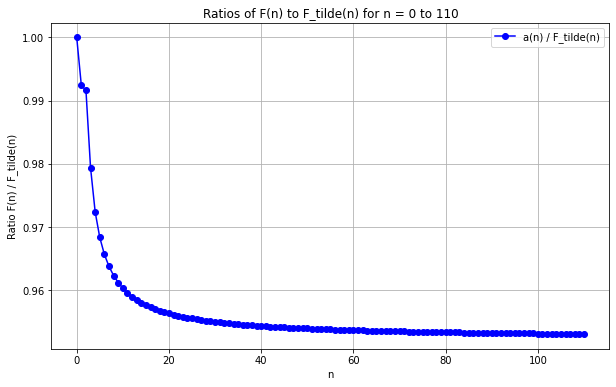

In [6]:
#The F_ntilde are above the F_n
import numpy as np
import matplotlib.pyplot as plt
from math import comb  # For binomial coefficients

# Step 1: Compute a(n) using dynamic programming
def compute_a(n_max):
    a = [0] * (n_max + 1)
    a[0] = 1  # Base case

    for n in range(1, n_max + 1):
        a[n] = sum(comb(n, k) * a[n - k] for k in range(1, n + 1))
    
    return a


# Step 3: Compute the first 110 values of a(n) and the ratios
n_max = 110
a_values = compute_a(n_max)
F_tilde_values = [compute_F_n_tilde(n) for n in range(n_max + 1)]
ratios = [(a_values[n] / F_tilde_values[n]) for n in range(n_max + 1)]

# Step 4: Plot the ratios
plt.figure(figsize=(10, 6))
plt.plot(range(n_max + 1), ratios, marker='o', linestyle='-', color='b', label='a(n) / F_tilde(n)')
plt.xlabel('n')
plt.ylabel('Ratio F(n) / F_tilde(n)')
plt.title('Ratios of F(n) to F_tilde(n) for n = 0 to 110')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
def tirer_Y (n,m):
    g_m = g_int (m,n)
    F_n_tilde = compute_F_n_tilde(n)
    bern = random.random()
    if bern < 2/(g_m/(mp.exp(1)*F_n_tilde)+4) : #on est dans l'un des deux cotés
        dg = random.randint(1,2)
        expdistribution = mp.mpf('-1')*mp.log(random.random())*mp.exp(1)*F_n_tilde/g_m
        if dg == 1 : return(m + 0.5 + mp.exp(1)*F_n_tilde/g_m + expdistribution)
        else : return(m -0.5 - mp.exp(1)*F_n_tilde/g_m - expdistribution)
    else:
        return(m + (1 - 2*random.random())*(mp.mpf('0.5') + mp.exp(1)*F_n_tilde/g_m))

In [8]:
def tirer_k (n,m):
    b = True
    while b :
        Y = tirer_Y(n,m)
        X = round(Y)
        if random.random()*g_function(Y,m,n) < g_int(X,n):
            b = False
    return(X)

If one wants to look at the distribution of $Y$ and $U$.

In [9]:
# results = [tirer_k(n,m) for _ in range(1000)]
# results2 = [round(tirer_Y(n,m)) for _ in range(1000)]
# # Calculate the mean and standard deviation
# # mean = np.mean(results)
# # std_dev = np.std(results)

# # print(f"Mean of outcomes: {mean}")
# # print(f"Standard deviation of outcomes: {std_dev}")


# # Plot the histogram
# plt.hist(results, bins=30, density=True, alpha=0.6, color='g', label='Outcomes')
# plt.hist(results2, bins=30, density=True, alpha=0.6, color='b', label='r2')

# # # Overlay the expected Gaussian distribution
# # x = np.linspace(min(results), max(results), 1000)
# # gaussian = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
# # plt.plot(x, gaussian, 'r-', label='Gaussian Fit')

# # # Add labels and legend
# plt.xlabel('Outcome')
# plt.ylabel('Density')
# plt.title('Distribution of tirer_W1() Outcomes')
# plt.legend()

# # Show the plot
# plt.show()

In [10]:
def remplissage_urnes (k,n): 
    urnes = []
    # t = 0
    for i in range (k):
        urnes.append([])
    for i in range (n):
        # gtavant = time.time()
        u = random.randint(0,k-1)
        # gtapres = time.time()
        # t+= (gtapres - gtavant)
        urnes[u].append(i)
    weak_ordering = []
    for i in range (k):
        if urnes[i] != []:
            weak_ordering.append(urnes[i])
    # print("temps passé à génerer des nombres" ,t)
    return(weak_ordering)

In [11]:
debut = time.time()

m = find_the_mode(n)
k = tirer_k(n,m)

print("There are",k,"urns")

apres_k = time.time()

print("Time to sample U" , apres_k - debut)

weak_ordering = remplissage_urnes(k,n)
print("First equivalence class : ",weak_ordering[0])
print("Number of subsets : ",len(weak_ordering))
print("Expectancy of the number of subsets (rounded) : ",round(n/(2*mp.ln(2))))
print("Difference to the expectancy in the number of subsets : ",round(n/(2*mp.ln(2))-len(weak_ordering)))
fin = time.time()

print("Total time of the procedure : ",fin - apres_k)

There are 1442495 urns
Time to sample U 0.005446195602416992
First equivalence class :  [192112]
Number of subsets :  721141
Expectancy of the number of subsets (rounded) :  721348
Difference to the expectancy in the number of subsets :  207
Total time of the procedure :  3.1344070434570312
